# 数据集原始分布

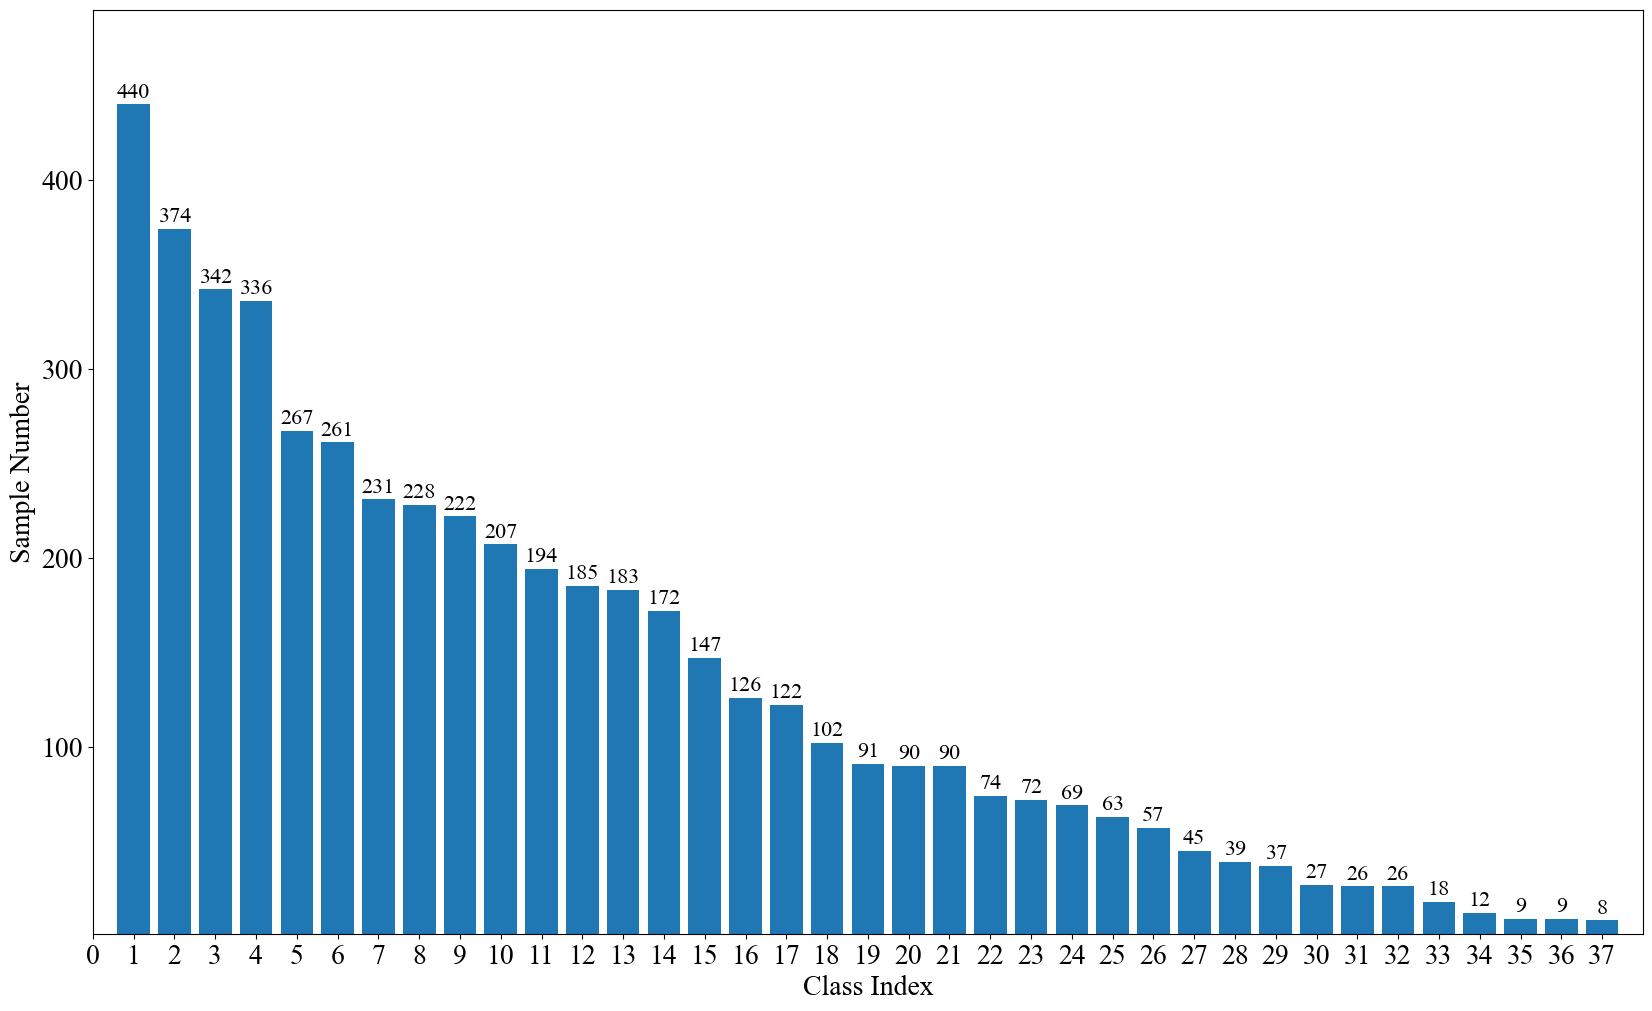

In [5]:
from glob import glob
import pandas as pd
import numpy as np
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
# 训练集探索
#数据集根目录
TRAIN_DATASET_PATH = r'D:\code\data\rundata\1111\train'
# TRAIN_DATASET_PATH = "E:\\Jupyter Notebook\\ZHANGHAO\\pytorch\\data\\带钢缺陷数据集\\数据集\\train"
#一个*表示根目录下对应类别文件夹，第er个*表示各类文件中的文件
image_fns = glob(os.path.join(TRAIN_DATASET_PATH, '*', '*.*'))

# print(image_fns[0].split('\\')[-2])
label_names = [s.split('\\')[-2] for s in image_fns]#获取标签

unique_labels = list(set(label_names))#将不一样的标签放到一个列表中
#37类
dir_lst = os.listdir(TRAIN_DATASET_PATH)#根目录下所有文件夹的名字
number_lst =dict()
class_name=[]
for i in dir_lst:
    path = os.path.join(TRAIN_DATASET_PATH,i)#各类的路径
    if os.path.isdir(path):
        num = len(glob(os.path.join(path,'*')))#各类路径中的文件个数
        number_lst[i]=num#存储各类数量
#         number_lst[int(i.replace('flaw', ''))]=num#存储各类数量
        if num == 0:
            print(i)
# print(number_lst)
number_lst_order=sorted(number_lst.items(),key=lambda x:x[1],reverse=True)
# print(number_lst_order)
#将字典解析为两个数组
number_lst =[]
class_name=[]
for i in range(len(number_lst_order)):
    number_lst.append(number_lst_order[i][1])
    class_name.append(number_lst_order[i][0])
# print(number_lst)
# print(class_name)
x = range(1,len(number_lst)+1)#横坐标
y = number_lst#纵坐标
fig, ax = plt.subplots(figsize=(20,12))#设置图表大小，以及得到ax
# 截尾平均数
# means = sum(sorted(y)[1:-1])/len(y[1:-1])#图标的平均值
# b = ax.bar(x, y, label='{}'.format(means))
b = ax.bar(x, y)#绘制条形图

# plt.xticks(x,labels=class_name)
plt.xticks(x)
# plt.title('X-SDD Dataset',fontdict={'family':'Times New Roman','size':20})#图表标题
for a, b in zip(x, y):#每一个条形图标注对应的数量
    ax.text(a, b+1, b, ha='center', va='bottom',fontdict={'family':'Times New Roman','size':16})
# plt.figure(figsize=(10,10))
plt.xlim((1,len(number_lst)+1))#横坐标的最大标注
plt.ylim((1,max(number_lst)+50))#纵坐标的最大标注
plt.xticks(range(len(x)+1),fontproperties={'family':'Times New Roman','size':20})#横坐标的字体设置
plt.yticks(fontproperties={'family':'Times New Roman','size':20})
plt.xlabel('Class Index',fontdict={'family':'Times New Roman','size':20})
plt.ylabel('Sample Number',fontdict={'family':'Times New Roman','size':20})
# plt.legend()#图标
# plt.savefig(r'E:\zh\data\2Data\论文图\37分类数据增强.jpg',bbox_inches='tight')
plt.savefig(r'E:\recordLive\论文\大论文\图\训练集原始分布.jpg',dpi=600,bbox_inches='tight')
plt.show()

# 数据集的划分6:4

In [4]:
import os
import math
import random
import shutil
path = r'D:\code\data\newdata'#原数据集路径
def set_split(old_path):
    new_path = r'D:\code\data\rundata\1111'#新数据集路径
#     if os.path.exists(old_path) == 1: #文件夹存在，则新建一个新的文件夹
#         os.makedirs(new_path)    #新建一个文件夹
#     else:
#         print('文件夹不存在！')
#         return 1
    for path , sub_dirs , files in os.walk(old_path): #文件夹下三层文件，三级文件夹的路径
        for new_sub_dir in sub_dirs:
            filenames = os.listdir(os.path.join(path,new_sub_dir))
#             filenames = list(filter(lambda x:x.endswith('.jpg') , filenames))
#             print(filenames)
            random.shuffle(filenames) #把序列中所有元素，随机排序  得到一个打乱了的列表
            for i in range(len(filenames)):
                if i < math.floor(0.4*len(filenames)):#math.floor  向下取整
                        sub_path = os.path.join(new_path , 'val',new_sub_dir)  #训练集
#                 elif i <math.floor(0.8*len(filenames)):
#                         sub_path = os.path.join(new_path , 'val' , new_sub_dir)  #验证集
                else:
                        sub_path = os.path.join(new_path, 'train', new_sub_dir)   #测试集
                if os.path.exists(sub_path) == 0: #不存在时
                         os.makedirs(sub_path)  #新建一个文件夹
                shutil.copy(os.path.join(path, new_sub_dir,filenames[i]) , os.path.join(sub_path , filenames[i]))  #拷贝  从第一个路径拷贝到第二个路径下
set_split(path)


# 数据增强

In [18]:
from PIL import ImageEnhance
import os
import numpy as np
from PIL import Image
import random
import shutil
from glob import glob
import cv2
from shutil import copy2

In [19]:
def brightnessEnhancement1(image):#亮度增强
#     image = Image.open(os.path.join(root_path, img_name))
    image=Image.fromarray(np.uint8(image))
    enh_bri = ImageEnhance.Brightness(image)
    brightness = 1.1+0.4*np.random.random()#取值范围1.1-1.5
#     brightness = 1.1
    image_brightened = enh_bri.enhance(brightness)
    image_brightened=np.array(image_brightened)
    return image_brightened
def flip(img, mode=1):
    """
    翻转
    :param img:
    :param mode: 1=水平翻转 / 0=垂直 / -1=水平垂直
    :return:
    """
    assert mode in (0, 1, -1), "mode is not right"
    return cv2.flip(img, flipCode=mode)
def gasuss_noise(image, mean=0, var=0.00001):
        '''
            添加高斯噪声
            mean : 均值
            var : 方差
        '''
#         image = Image.open(os.path.join(root_path, img_name))
#         image = np.array(image)
        image = np.array(image / 255, dtype=float)
        noise = np.random.normal(mean, var ** 0.5, image.shape)
        out = image + noise
        if out.min() < 0:
            low_clip = -1.
        else:
            low_clip = 0.
        out = np.clip(out, low_clip, 1.0)
        out = np.uint8(out * 255)
#         out = cv2.cvtColor(out, cv2.COLOR_RGB2BGR)
        out = Image.fromarray(out)
        out=np.array(out)
        # cv.imshow("gasuss", out)
        return out
def transSave(img, divisor=0.05):
#     img = cv2.imread(picPath)
    rows, cols = img.shape[:2]
    # 计算偏移量
    deltaX = rows * divisor
    deltaY = cols * divisor

    M1 = np.float32([[1, 0, deltaX], [0, 1, 0]])
    M2 = np.float32([[1, 0, -deltaX], [0, 1, 0]])
    M3 = np.float32([[1, 0, 0], [0, 1, deltaY]])
    M4 = np.float32([[1, 0, 0], [0, 1, -deltaY]])
    # 用仿射变换实现平移
    typePoint = np.random.randint(low=1, high=5)
    if typePoint==1:
        img_s = cv2.warpAffine(img, M1, (cols, rows))
    elif typePoint==2:
        img_s = cv2.warpAffine(img, M2, (cols, rows))
    elif typePoint==3:
        img_s = cv2.warpAffine(img, M3, (cols, rows))
    else:
        img_s = cv2.warpAffine(img, M4, (cols, rows))
    return img_s
#     # 保存图片
#     cv2.imwrite(picPath.replace('.jpg', 'srcRightMove.jpg'), img_s1)#右移
#     cv2.imwrite(picPath.replace('.jpg', 'srcLeftMove.jpg'), img_s2)#左移
#     cv2.imwrite(picPath.replace('.jpg', 'srcDowmMove.jpg'), img_s3)#下移
#     cv2.imwrite(picPath.replace('.jpg', 'srcUpMove.jpg'), img_s4)#上移
def rule_crop(img, box_ratio=(3. / 4, 3. / 4), location_type='CC', resize_w=100, resize_h=100):
        """
        按照一定规则进行裁剪, 直接在原图尺寸上操作，不对原图进行
        :param img:
        :param box_ratio: 剪切的 比例：  （宽度上的比例， 高度上的比例）
        :param location_type: 具体在=哪个位置： 以下其中一个：
                LT : 左上角
                RT : 右上角
                LB : 左下角
                RB : 右下角
                CC : 中心
        :param resize_w: 输出图的width
        :param resize_h: 输出图的height
        :return:
        """
        assert location_type in ('LT', 'RT', 'LB', 'RB', 'CC'), 'must have a location .'
        is_gray = False
        if len(img.shape) == 3:
            h, w, c = img.shape
        elif len(img.shape) == 2:
            h, w = img.shape
            is_gray = True

        crop_w, crop_h = int(w * box_ratio[0]), int(h * box_ratio[1])
        crop_img = np.zeros([10, 10])
        if location_type == 'LT':
            crop_img = img[:crop_h, :crop_w, :] if not is_gray else img[:crop_h, :crop_w]
        elif location_type == 'RT':
            crop_img = img[:crop_h:, w - crop_w:, :] if not is_gray else img[:crop_h:, w - crop_w:]
        elif location_type == 'LB':
            crop_img = img[h - crop_h:, :crop_w, :] if not is_gray else img[h - crop_h:, :crop_w]
        elif location_type == 'RB':
            crop_img = img[h - crop_h:, w - crop_w:, :] if not is_gray else img[h - crop_h:, w - crop_w:]
        elif location_type == 'CC':
            start_h = (h - crop_h) // 2
            start_w = (w - crop_w) // 2
            crop_img = img[start_h:start_h + crop_h, start_w:start_w + crop_w, :] if not is_gray else img[
                                                                                                      start_h:start_h + crop_h,
                                                                                                      start_w:start_w + crop_w]
#         picPath=r"E:\zh\data\thesisImages\1\6class\0.jpg"
#         cv2.imwrite(picPath.replace('.jpg', 'srcCrop.jpg'), crop_img)
        return crop_img

In [20]:
def agument37(imageDir,saveDir):
    i=1
    for name in os.listdir(imageDir):
        i=i+1
        path=os.path.join(imageDir,name)
        name=path.split('\\')[-1].split('.')[0]
        srcImage = Image.open(path)#原图
        image = np.array(srcImage)
        
        #翻转
        saveName1=name+"levelFlipLight"+".jpg"
        saveName2=name+"verticalFlipLight"+".jpg"
        saveName3=name+"levelVerticalFlipLight"+".jpg"
        saveName14=name+"srcLight"+".jpg"
        
        saveName4=name+"levelFlipGasussNoise"+".jpg"
        saveName5=name+"verticalFlipGasussNoise"+".jpg"
        saveName6=name+"levelVerticalFlipGasussNoise"+".jpg"
        saveName15=name+"srcGasussNoise"+".jpg"
        
        saveName7=name+"levelFlipMove"+".jpg"
        saveName8=name+"verticalFlipMove"+".jpg"
        saveName9=name+"levelVerticalFlipMove"+".jpg"
        saveName16=name+"srcMove"+".jpg"
        
        saveName11=name+"levelFlipCrop"+".jpg"
        saveName12=name+"verticalFlipCrop"+".jpg"
        saveName13=name+"levelVerticalFlipCrop"+".jpg"
        saveName17=name+"srcCrop"+".jpg"
        
        saveImage1=flip(image,1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelFlip
        saveImage2=brightnessEnhancement1(saveImage1)
        saveImage3=Image.fromarray(np.uint8(saveImage2))
        saveImage3.save(os.path.join(saveDir, saveName1))
        
        saveImage4=flip(image,0)#1=水平翻转 / 0=垂直 / -1=水平垂直，verticalFlip
        saveImage5=brightnessEnhancement1(saveImage4)
        saveImage6=Image.fromarray(np.uint8(saveImage5))
        saveImage6.save(os.path.join(saveDir, saveName2))
        
        saveImage7=flip(image,-1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelVerticalFlip
        saveImage8=brightnessEnhancement1(saveImage7)
        saveImage9=Image.fromarray(np.uint8(saveImage8))
        saveImage9.save(os.path.join(saveDir, saveName3))
        
        saveImage31=brightnessEnhancement1(image)
        saveImage32=Image.fromarray(np.uint8(saveImage31))
        saveImage32.save(os.path.join(saveDir, saveName14))
        
        saveImage11=gasuss_noise(saveImage1)#高斯噪声
        saveImage12=Image.fromarray(np.uint8(saveImage11))
        saveImage12.save(os.path.join(saveDir, saveName4))
        
        saveImage13=gasuss_noise(saveImage4)
        saveImage14=Image.fromarray(np.uint8(saveImage13))
        saveImage14.save(os.path.join(saveDir, saveName5))
        
        saveImage15=gasuss_noise(saveImage7)
        saveImage16=Image.fromarray(np.uint8(saveImage15))
        saveImage16.save(os.path.join(saveDir, saveName6))
        
        saveImage33=gasuss_noise(image)
        saveImage34=Image.fromarray(np.uint8(saveImage33))
        saveImage34.save(os.path.join(saveDir, saveName15))
        
        saveImage17=transSave(saveImage1)#移动
        saveImage18=Image.fromarray(np.uint8(saveImage17))
        saveImage18.save(os.path.join(saveDir, saveName7))
        
        saveImage19=transSave(saveImage4)
        saveImage21=Image.fromarray(np.uint8(saveImage19))
        saveImage21.save(os.path.join(saveDir, saveName8))
        
        saveImage22=transSave(saveImage7)
        saveImage23=Image.fromarray(np.uint8(saveImage22))
        saveImage23.save(os.path.join(saveDir, saveName9))
        
        saveImage35=transSave(image)
        saveImage36=Image.fromarray(np.uint8(saveImage35))
        saveImage36.save(os.path.join(saveDir, saveName16))
        
        saveImage24=rule_crop(saveImage1)#裁剪
        saveImage25=Image.fromarray(np.uint8(saveImage24))
        saveImage25.save(os.path.join(saveDir, saveName11))
        
        saveImage26=rule_crop(saveImage4)#裁剪
        saveImage27=Image.fromarray(np.uint8(saveImage26))
        saveImage27.save(os.path.join(saveDir, saveName12))
        
        saveImage28=rule_crop(saveImage7)#裁剪
        saveImage29=Image.fromarray(np.uint8(saveImage28))
        saveImage29.save(os.path.join(saveDir, saveName13))
        
        saveImage37=rule_crop(image)#裁剪
        saveImage38=Image.fromarray(np.uint8(saveImage37))
        saveImage38.save(os.path.join(saveDir, saveName17))
#         #17倍保存完毕，接下来是29倍
        saveName18=name+"GasussNoiseMove"+".jpg"
        saveName19=name+"levelFlipGasussNoiseMove"+".jpg"
        saveName21=name+"verticalFlipGasussNoiseMove"+".jpg"
        saveName22=name+"levelVerticalGasussNoiseMove"+".jpg"
        
        saveName23=name+"GasussNoiseLight"+".jpg"
        saveName24=name+"levelFlipGasussNoiseLight"+".jpg"
        saveName25=name+"verticalFlipGasussNoiseLight"+".jpg"
        saveName26=name+"levelVerticalGasussNoiseLight"+".jpg"
        
        saveName27=name+"GasussNoiseCrop"+".jpg"
        saveName28=name+"levelFlipGasussNoiseCrop"+".jpg"
        saveName29=name+"verticalFlipGasussNoiseCrop"+".jpg"
        saveName31=name+"levelVerticalGasussNoiseCrop"+".jpg"
        
        saveImage39=transSave(saveImage33)#高斯移动，原，水平，垂直。水平垂直
        saveImage41=Image.fromarray(np.uint8(saveImage39))
        saveImage41.save(os.path.join(saveDir, saveName18))
        
        saveImage42=transSave(saveImage11)
        saveImage43=Image.fromarray(np.uint8(saveImage42))
        saveImage43.save(os.path.join(saveDir, saveName19))
        
        saveImage44=transSave(saveImage13)
        saveImage45=Image.fromarray(np.uint8(saveImage44))
        saveImage45.save(os.path.join(saveDir, saveName21))
        
        saveImage46=transSave(saveImage15)
        saveImage47=Image.fromarray(np.uint8(saveImage46))
        saveImage47.save(os.path.join(saveDir, saveName22))
        
        saveImage48=brightnessEnhancement1(saveImage33)#高斯亮度，原，水平，垂直。水平垂直
        saveImage49=Image.fromarray(np.uint8(saveImage48))
        saveImage49.save(os.path.join(saveDir, saveName23))
        
        saveImage51=brightnessEnhancement1(saveImage11)
        saveImage52=Image.fromarray(np.uint8(saveImage51))
        saveImage52.save(os.path.join(saveDir, saveName24))
        
        saveImage53=brightnessEnhancement1(saveImage13)
        saveImage54=Image.fromarray(np.uint8(saveImage53))
        saveImage54.save(os.path.join(saveDir, saveName25))
        
        saveImage55=brightnessEnhancement1(saveImage15)
        saveImage56=Image.fromarray(np.uint8(saveImage55))
        saveImage56.save(os.path.join(saveDir, saveName26))
        
        saveImage57=rule_crop(saveImage33)#高斯裁剪，原，水平，垂直。水平垂直
        saveImage58=Image.fromarray(np.uint8(saveImage57))
        saveImage58.save(os.path.join(saveDir, saveName27))
        
        saveImage59=rule_crop(saveImage11)
        saveImage61=Image.fromarray(np.uint8(saveImage59))
        saveImage61.save(os.path.join(saveDir, saveName28))
        
        saveImage62=rule_crop(saveImage13)
        saveImage63=Image.fromarray(np.uint8(saveImage62))
        saveImage63.save(os.path.join(saveDir, saveName29))
        
        saveImage64=rule_crop(saveImage15)
        saveImage65=Image.fromarray(np.uint8(saveImage64))
        saveImage65.save(os.path.join(saveDir, saveName31))
#第二个阶段完成，最后37倍的阶段
        saveName32=name+"GasussNoiseLightMove"+".jpg"
        saveName33=name+"levelFlipGasussNoiseLightMove"+".jpg"
        saveName34=name+"verticalFlipGasussNoiseLightMove"+".jpg"
        saveName35=name+"levelVerticalGasussNoiseLightMove"+".jpg"
        
        saveName36=name+"GasussNoiseLightCrop"+".jpg"
        saveName37=name+"levelFlipGasussNoiseLightCrop"+".jpg"
        saveName38=name+"verticalFlipGasussNoiseLightCrop"+".jpg"
        saveName39=name+"levelVerticalGasussNoiseLightCrop"+".jpg"
        
        saveImage66=transSave(saveImage48)#高斯亮度移动，原，水平，垂直。水平垂直
        saveImage67=Image.fromarray(np.uint8(saveImage66))
        saveImage67.save(os.path.join(saveDir, saveName32))
        
        saveImage68=transSave(saveImage51)
        saveImage69=Image.fromarray(np.uint8(saveImage68))
        saveImage69.save(os.path.join(saveDir, saveName33))
        
        saveImage71=transSave(saveImage53)
        saveImage72=Image.fromarray(np.uint8(saveImage71))
        saveImage72.save(os.path.join(saveDir, saveName34))
        
        saveImage73=transSave(saveImage55)
        saveImage74=Image.fromarray(np.uint8(saveImage73))
        saveImage74.save(os.path.join(saveDir, saveName35))
        
        saveImage75=rule_crop(saveImage48)#高斯亮度裁剪，原，水平，垂直。水平垂直
        saveImage76=Image.fromarray(np.uint8(saveImage75))
        saveImage76.save(os.path.join(saveDir, saveName36))
        
        saveImage77=rule_crop(saveImage51)
        saveImage78=Image.fromarray(np.uint8(saveImage77))
        saveImage78.save(os.path.join(saveDir, saveName37))
        
        saveImage79=rule_crop(saveImage53)
        saveImage81=Image.fromarray(np.uint8(saveImage79))
        saveImage81.save(os.path.join(saveDir, saveName38))
        
        saveImage82=rule_crop(saveImage55)
        saveImage83=Image.fromarray(np.uint8(saveImage82))
        saveImage83.save(os.path.join(saveDir, saveName39))
        

In [21]:
def agument17(imageDir,saveDir):
    i=1
    for name in os.listdir(imageDir):
        i=i+1
        path=os.path.join(imageDir,name)
        name=path.split('\\')[-1].split('.')[0]
        srcImage = Image.open(path)#原图
        image = np.array(srcImage)
        
        #翻转
        saveName1=name+"levelFlipLight"+".jpg"
        saveName2=name+"verticalFlipLight"+".jpg"
        saveName3=name+"levelVerticalFlipLight"+".jpg"
        saveName14=name+"srcLight"+".jpg"
        
        saveName4=name+"levelFlipGasussNoise"+".jpg"
        saveName5=name+"verticalFlipGasussNoise"+".jpg"
        saveName6=name+"levelVerticalFlipGasussNoise"+".jpg"
        saveName15=name+"srcGasussNoise"+".jpg"
        
        saveName7=name+"levelFlipMove"+".jpg"
        saveName8=name+"verticalFlipMove"+".jpg"
        saveName9=name+"levelVerticalFlipMove"+".jpg"
        saveName16=name+"srcMove"+".jpg"
        
        saveName11=name+"levelFlipCrop"+".jpg"
        saveName12=name+"verticalFlipCrop"+".jpg"
        saveName13=name+"levelVerticalFlipCrop"+".jpg"
        saveName17=name+"srcCrop"+".jpg"
        
        saveImage1=flip(image,1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelFlip,亮度
        
        saveImage4=flip(image,0)#1=水平翻转 / 0=垂直 / -1=水平垂直，verticalFlip
        
        saveImage7=flip(image,-1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelVerticalFlip
        
        saveImage11=gasuss_noise(saveImage1)#高斯噪声
        saveImage12=Image.fromarray(np.uint8(saveImage11))
        saveImage12.save(os.path.join(saveDir, saveName4))
        
        saveImage13=gasuss_noise(saveImage4)
        saveImage14=Image.fromarray(np.uint8(saveImage13))
        saveImage14.save(os.path.join(saveDir, saveName5))
        
        saveImage15=gasuss_noise(saveImage7)
        saveImage16=Image.fromarray(np.uint8(saveImage15))
        saveImage16.save(os.path.join(saveDir, saveName6))
        
        saveImage33=gasuss_noise(image)
        saveImage34=Image.fromarray(np.uint8(saveImage33))
        saveImage34.save(os.path.join(saveDir, saveName15))
        
#         #17倍保存完毕，接下来是29倍
        saveName18=name+"GasussNoiseMove"+".jpg"
        saveName19=name+"levelFlipGasussNoiseMove"+".jpg"
        saveName21=name+"verticalFlipGasussNoiseMove"+".jpg"
        saveName22=name+"levelVerticalGasussNoiseMove"+".jpg"
        
        saveName23=name+"GasussNoiseLight"+".jpg"
        saveName24=name+"levelFlipGasussNoiseLight"+".jpg"
        saveName25=name+"verticalFlipGasussNoiseLight"+".jpg"
        saveName26=name+"levelVerticalGasussNoiseLight"+".jpg"
        
        saveName27=name+"GasussNoiseCrop"+".jpg"
        saveName28=name+"levelFlipGasussNoiseCrop"+".jpg"
        saveName29=name+"verticalFlipGasussNoiseCrop"+".jpg"
        saveName31=name+"levelVerticalGasussNoiseCrop"+".jpg"
        
        saveImage48=brightnessEnhancement1(saveImage33)#高斯亮度，原，水平，垂直。水平垂直
        saveImage49=Image.fromarray(np.uint8(saveImage48))
        saveImage49.save(os.path.join(saveDir, saveName23))
        
        saveImage51=brightnessEnhancement1(saveImage11)
        saveImage52=Image.fromarray(np.uint8(saveImage51))
        saveImage52.save(os.path.join(saveDir, saveName24))
        
        saveImage53=brightnessEnhancement1(saveImage13)
        saveImage54=Image.fromarray(np.uint8(saveImage53))
        saveImage54.save(os.path.join(saveDir, saveName25))
        
        saveImage55=brightnessEnhancement1(saveImage15)
        saveImage56=Image.fromarray(np.uint8(saveImage55))
        saveImage56.save(os.path.join(saveDir, saveName26))
        
#第二个阶段完成，最后37倍的阶段
        saveName32=name+"GasussNoiseLightMove"+".jpg"
        saveName33=name+"levelFlipGasussNoiseLightMove"+".jpg"
        saveName34=name+"verticalFlipGasussNoiseLightMove"+".jpg"
        saveName35=name+"levelVerticalGasussNoiseLightMove"+".jpg"
        
        saveName36=name+"GasussNoiseLightCrop"+".jpg"
        saveName37=name+"levelFlipGasussNoiseLightCrop"+".jpg"
        saveName38=name+"verticalFlipGasussNoiseLightCrop"+".jpg"
        saveName39=name+"levelVerticalGasussNoiseLightCrop"+".jpg"
        
        saveImage66=transSave(saveImage48)#高斯亮度移动，原，水平，垂直。水平垂直
        saveImage67=Image.fromarray(np.uint8(saveImage66))
        saveImage67.save(os.path.join(saveDir, saveName32))
        
        saveImage68=transSave(saveImage51)
        saveImage69=Image.fromarray(np.uint8(saveImage68))
        saveImage69.save(os.path.join(saveDir, saveName33))
        
        saveImage71=transSave(saveImage53)
        saveImage72=Image.fromarray(np.uint8(saveImage71))
        saveImage72.save(os.path.join(saveDir, saveName34))
        
        saveImage73=transSave(saveImage55)
        saveImage74=Image.fromarray(np.uint8(saveImage73))
        saveImage74.save(os.path.join(saveDir, saveName35))
        
        saveImage75=rule_crop(saveImage48)#高斯亮度裁剪，原，水平，垂直。水平垂直
        saveImage76=Image.fromarray(np.uint8(saveImage75))
        saveImage76.save(os.path.join(saveDir, saveName36))
        
        saveImage77=rule_crop(saveImage51)
        saveImage78=Image.fromarray(np.uint8(saveImage77))
        saveImage78.save(os.path.join(saveDir, saveName37))
        
        saveImage79=rule_crop(saveImage53)
        saveImage81=Image.fromarray(np.uint8(saveImage79))
        saveImage81.save(os.path.join(saveDir, saveName38))
        
        saveImage82=rule_crop(saveImage55)
        saveImage83=Image.fromarray(np.uint8(saveImage82))
        saveImage83.save(os.path.join(saveDir, saveName39))
        

In [22]:
def agument9(imageDir,saveDir):
    i=1
    for name in os.listdir(imageDir):
        i=i+1
        path=os.path.join(imageDir,name)
        name=path.split('\\')[-1].split('.')[0]
        srcImage = Image.open(path)#原图
        image = np.array(srcImage)
        
        #翻转
        saveName1=name+"levelFlipLight"+".jpg"
        saveName2=name+"verticalFlipLight"+".jpg"
        saveName3=name+"levelVerticalFlipLight"+".jpg"
        saveName14=name+"srcLight"+".jpg"
        
        saveName4=name+"levelFlipGasussNoise"+".jpg"
        saveName5=name+"verticalFlipGasussNoise"+".jpg"
        saveName6=name+"levelVerticalFlipGasussNoise"+".jpg"
        saveName15=name+"srcGasussNoise"+".jpg"
        
        saveName7=name+"levelFlipMove"+".jpg"
        saveName8=name+"verticalFlipMove"+".jpg"
        saveName9=name+"levelVerticalFlipMove"+".jpg"
        saveName16=name+"srcMove"+".jpg"
        
        saveName11=name+"levelFlipCrop"+".jpg"
        saveName12=name+"verticalFlipCrop"+".jpg"
        saveName13=name+"levelVerticalFlipCrop"+".jpg"
        saveName17=name+"srcCrop"+".jpg"
        
        saveImage1=flip(image,1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelFlip,亮度
        
        saveImage4=flip(image,0)#1=水平翻转 / 0=垂直 / -1=水平垂直，verticalFlip
        
        saveImage7=flip(image,-1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelVerticalFlip
        
        saveImage11=gasuss_noise(saveImage1)#高斯噪声

        saveImage13=gasuss_noise(saveImage4)
        
        saveImage15=gasuss_noise(saveImage7)
        
        saveImage33=gasuss_noise(image)
        
#         #17倍保存完毕，接下来是29倍
        saveName18=name+"GasussNoiseMove"+".jpg"
        saveName19=name+"levelFlipGasussNoiseMove"+".jpg"
        saveName21=name+"verticalFlipGasussNoiseMove"+".jpg"
        saveName22=name+"levelVerticalGasussNoiseMove"+".jpg"
        
        saveName23=name+"GasussNoiseLight"+".jpg"
        saveName24=name+"levelFlipGasussNoiseLight"+".jpg"
        saveName25=name+"verticalFlipGasussNoiseLight"+".jpg"
        saveName26=name+"levelVerticalGasussNoiseLight"+".jpg"
        
        saveName27=name+"GasussNoiseCrop"+".jpg"
        saveName28=name+"levelFlipGasussNoiseCrop"+".jpg"
        saveName29=name+"verticalFlipGasussNoiseCrop"+".jpg"
        saveName31=name+"levelVerticalGasussNoiseCrop"+".jpg"
        
        saveImage48=brightnessEnhancement1(saveImage33)#高斯亮度，原，水平，垂直。水平垂直
        
        saveImage51=brightnessEnhancement1(saveImage11)
        
        saveImage53=brightnessEnhancement1(saveImage13)
        
        saveImage55=brightnessEnhancement1(saveImage15)
        
#第二个阶段完成，最后37倍的阶段
        saveName32=name+"GasussNoiseLightMove"+".jpg"
        saveName33=name+"levelFlipGasussNoiseLightMove"+".jpg"
        saveName34=name+"verticalFlipGasussNoiseLightMove"+".jpg"
        saveName35=name+"levelVerticalGasussNoiseLightMove"+".jpg"
        
        saveName36=name+"GasussNoiseLightCrop"+".jpg"
        saveName37=name+"levelFlipGasussNoiseLightCrop"+".jpg"
        saveName38=name+"verticalFlipGasussNoiseLightCrop"+".jpg"
        saveName39=name+"levelVerticalGasussNoiseLightCrop"+".jpg"
        
        saveImage66=transSave(saveImage48)#高斯亮度移动，原，水平，垂直。水平垂直
        saveImage67=Image.fromarray(np.uint8(saveImage66))
        saveImage67.save(os.path.join(saveDir, saveName32))
        
        saveImage68=transSave(saveImage51)
        saveImage69=Image.fromarray(np.uint8(saveImage68))
        saveImage69.save(os.path.join(saveDir, saveName33))
        
        saveImage71=transSave(saveImage53)
        saveImage72=Image.fromarray(np.uint8(saveImage71))
        saveImage72.save(os.path.join(saveDir, saveName34))
        
        saveImage73=transSave(saveImage55)
        saveImage74=Image.fromarray(np.uint8(saveImage73))
        saveImage74.save(os.path.join(saveDir, saveName35))
        
        saveImage75=rule_crop(saveImage48)#高斯亮度裁剪，原，水平，垂直。水平垂直
        saveImage76=Image.fromarray(np.uint8(saveImage75))
        saveImage76.save(os.path.join(saveDir, saveName36))
        
        saveImage77=rule_crop(saveImage51)
        saveImage78=Image.fromarray(np.uint8(saveImage77))
        saveImage78.save(os.path.join(saveDir, saveName37))
        
        saveImage79=rule_crop(saveImage53)
        saveImage81=Image.fromarray(np.uint8(saveImage79))
        saveImage81.save(os.path.join(saveDir, saveName38))
        
        saveImage82=rule_crop(saveImage55)
        saveImage83=Image.fromarray(np.uint8(saveImage82))
        saveImage83.save(os.path.join(saveDir, saveName39))
        

In [23]:
def agument5(imageDir,saveDir):
    i=1
    for name in os.listdir(imageDir):
        i=i+1
        path=os.path.join(imageDir,name)
        name=path.split('\\')[-1].split('.')[0]
        srcImage = Image.open(path)#原图
        image = np.array(srcImage)
        
        #翻转
        saveName1=name+"levelFlipLight"+".jpg"
        saveName2=name+"verticalFlipLight"+".jpg"
        saveName3=name+"levelVerticalFlipLight"+".jpg"
        saveName14=name+"srcLight"+".jpg"
        
        saveName4=name+"levelFlipGasussNoise"+".jpg"
        saveName5=name+"verticalFlipGasussNoise"+".jpg"
        saveName6=name+"levelVerticalFlipGasussNoise"+".jpg"
        saveName15=name+"srcGasussNoise"+".jpg"
        
        saveName7=name+"levelFlipMove"+".jpg"
        saveName8=name+"verticalFlipMove"+".jpg"
        saveName9=name+"levelVerticalFlipMove"+".jpg"
        saveName16=name+"srcMove"+".jpg"
        
        saveName11=name+"levelFlipCrop"+".jpg"
        saveName12=name+"verticalFlipCrop"+".jpg"
        saveName13=name+"levelVerticalFlipCrop"+".jpg"
        saveName17=name+"srcCrop"+".jpg"
        
        saveImage1=flip(image,1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelFlip,亮度
        
        saveImage4=flip(image,0)#1=水平翻转 / 0=垂直 / -1=水平垂直，verticalFlip
        
        saveImage7=flip(image,-1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelVerticalFlip
        
        saveImage11=gasuss_noise(saveImage1)#高斯噪声

        saveImage13=gasuss_noise(saveImage4)
        
        saveImage15=gasuss_noise(saveImage7)
        
        saveImage33=gasuss_noise(image)
        
#         #17倍保存完毕，接下来是29倍
        saveName18=name+"GasussNoiseMove"+".jpg"
        saveName19=name+"levelFlipGasussNoiseMove"+".jpg"
        saveName21=name+"verticalFlipGasussNoiseMove"+".jpg"
        saveName22=name+"levelVerticalGasussNoiseMove"+".jpg"
        
        saveName23=name+"GasussNoiseLight"+".jpg"
        saveName24=name+"levelFlipGasussNoiseLight"+".jpg"
        saveName25=name+"verticalFlipGasussNoiseLight"+".jpg"
        saveName26=name+"levelVerticalGasussNoiseLight"+".jpg"
        
        saveName27=name+"GasussNoiseCrop"+".jpg"
        saveName28=name+"levelFlipGasussNoiseCrop"+".jpg"
        saveName29=name+"verticalFlipGasussNoiseCrop"+".jpg"
        saveName31=name+"levelVerticalGasussNoiseCrop"+".jpg"
        
        saveImage48=brightnessEnhancement1(saveImage33)#高斯亮度，原，水平，垂直。水平垂直
        
        saveImage51=brightnessEnhancement1(saveImage11)
        
        saveImage53=brightnessEnhancement1(saveImage13)
        
        saveImage55=brightnessEnhancement1(saveImage15)
        
#第二个阶段完成，最后37倍的阶段
        saveName32=name+"GasussNoiseLightMove"+".jpg"
        saveName33=name+"levelFlipGasussNoiseLightMove"+".jpg"
        saveName34=name+"verticalFlipGasussNoiseLightMove"+".jpg"
        saveName35=name+"levelVerticalGasussNoiseLightMove"+".jpg"
        
        saveName36=name+"GasussNoiseLightCrop"+".jpg"
        saveName37=name+"levelFlipGasussNoiseLightCrop"+".jpg"
        saveName38=name+"verticalFlipGasussNoiseLightCrop"+".jpg"
        saveName39=name+"levelVerticalGasussNoiseLightCrop"+".jpg"
        
        saveImage66=transSave(saveImage48)#高斯亮度移动，原，水平，垂直。水平垂直
        saveImage67=Image.fromarray(np.uint8(saveImage66))
        saveImage67.save(os.path.join(saveDir, saveName32))
        
        saveImage68=transSave(saveImage51)
        saveImage69=Image.fromarray(np.uint8(saveImage68))
        saveImage69.save(os.path.join(saveDir, saveName33))
        
        saveImage71=transSave(saveImage53)
        saveImage72=Image.fromarray(np.uint8(saveImage71))
        saveImage72.save(os.path.join(saveDir, saveName34))
        
        saveImage73=transSave(saveImage55)
        saveImage74=Image.fromarray(np.uint8(saveImage73))
        saveImage74.save(os.path.join(saveDir, saveName35))
        

In [24]:
def agument4(imageDir,saveDir):
    i=1
    for name in os.listdir(imageDir):
        i=i+1
        path=os.path.join(imageDir,name)
        name=path.split('\\')[-1].split('.')[0]
        srcImage = Image.open(path)#原图
        image = np.array(srcImage)
        
        #翻转
        saveName1=name+"levelFlipLight"+".jpg"
        saveName2=name+"verticalFlipLight"+".jpg"
        saveName3=name+"levelVerticalFlipLight"+".jpg"
        saveName14=name+"srcLight"+".jpg"
        
        saveName4=name+"levelFlipGasussNoise"+".jpg"
        saveName5=name+"verticalFlipGasussNoise"+".jpg"
        saveName6=name+"levelVerticalFlipGasussNoise"+".jpg"
        saveName15=name+"srcGasussNoise"+".jpg"
        
        saveName7=name+"levelFlipMove"+".jpg"
        saveName8=name+"verticalFlipMove"+".jpg"
        saveName9=name+"levelVerticalFlipMove"+".jpg"
        saveName16=name+"srcMove"+".jpg"
        
        saveName11=name+"levelFlipCrop"+".jpg"
        saveName12=name+"verticalFlipCrop"+".jpg"
        saveName13=name+"levelVerticalFlipCrop"+".jpg"
        saveName17=name+"srcCrop"+".jpg"
        
        saveImage1=flip(image,1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelFlip,亮度
        
        saveImage4=flip(image,0)#1=水平翻转 / 0=垂直 / -1=水平垂直，verticalFlip
        
        saveImage7=flip(image,-1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelVerticalFlip
        
        saveImage11=gasuss_noise(saveImage1)#高斯噪声

        saveImage13=gasuss_noise(saveImage4)
        
        saveImage15=gasuss_noise(saveImage7)
        
        saveImage33=gasuss_noise(image)
        
#         #17倍保存完毕，接下来是29倍
        saveName18=name+"GasussNoiseMove"+".jpg"
        saveName19=name+"levelFlipGasussNoiseMove"+".jpg"
        saveName21=name+"verticalFlipGasussNoiseMove"+".jpg"
        saveName22=name+"levelVerticalGasussNoiseMove"+".jpg"
        
        saveName23=name+"GasussNoiseLight"+".jpg"
        saveName24=name+"levelFlipGasussNoiseLight"+".jpg"
        saveName25=name+"verticalFlipGasussNoiseLight"+".jpg"
        saveName26=name+"levelVerticalGasussNoiseLight"+".jpg"
        
        saveName27=name+"GasussNoiseCrop"+".jpg"
        saveName28=name+"levelFlipGasussNoiseCrop"+".jpg"
        saveName29=name+"verticalFlipGasussNoiseCrop"+".jpg"
        saveName31=name+"levelVerticalGasussNoiseCrop"+".jpg"
        
        saveImage48=brightnessEnhancement1(saveImage33)#高斯亮度，原，水平，垂直。水平垂直
        
        saveImage51=brightnessEnhancement1(saveImage11)
        
        saveImage53=brightnessEnhancement1(saveImage13)
        
        saveImage55=brightnessEnhancement1(saveImage15)
        
#第二个阶段完成，最后37倍的阶段
        saveName32=name+"GasussNoiseLightMove"+".jpg"
        saveName33=name+"levelFlipGasussNoiseLightMove"+".jpg"
        saveName34=name+"verticalFlipGasussNoiseLightMove"+".jpg"
        saveName35=name+"levelVerticalGasussNoiseLightMove"+".jpg"
        
        saveName36=name+"GasussNoiseLightCrop"+".jpg"
        saveName37=name+"levelFlipGasussNoiseLightCrop"+".jpg"
        saveName38=name+"verticalFlipGasussNoiseLightCrop"+".jpg"
        saveName39=name+"levelVerticalGasussNoiseLightCrop"+".jpg"
        
        saveImage66=transSave(saveImage48)#高斯亮度移动，原，水平，垂直。水平垂直
        saveImage67=Image.fromarray(np.uint8(saveImage66))
        saveImage67.save(os.path.join(saveDir, saveName32))
        
        saveImage68=transSave(saveImage51)
        saveImage69=Image.fromarray(np.uint8(saveImage68))
        saveImage69.save(os.path.join(saveDir, saveName33))
        
        saveImage71=transSave(saveImage53)
        saveImage72=Image.fromarray(np.uint8(saveImage71))
        saveImage72.save(os.path.join(saveDir, saveName34))
        
        
        

In [25]:
def agument3(imageDir,saveDir):
    i=1
    for name in os.listdir(imageDir):
        i=i+1
        path=os.path.join(imageDir,name)
        name=path.split('\\')[-1].split('.')[0]
        srcImage = Image.open(path)#原图
        image = np.array(srcImage)
        
        #翻转
        saveName1=name+"levelFlipLight"+".jpg"
        saveName2=name+"verticalFlipLight"+".jpg"
        saveName3=name+"levelVerticalFlipLight"+".jpg"
        saveName14=name+"srcLight"+".jpg"
        
        saveName4=name+"levelFlipGasussNoise"+".jpg"
        saveName5=name+"verticalFlipGasussNoise"+".jpg"
        saveName6=name+"levelVerticalFlipGasussNoise"+".jpg"
        saveName15=name+"srcGasussNoise"+".jpg"
        
        saveName7=name+"levelFlipMove"+".jpg"
        saveName8=name+"verticalFlipMove"+".jpg"
        saveName9=name+"levelVerticalFlipMove"+".jpg"
        saveName16=name+"srcMove"+".jpg"
        
        saveName11=name+"levelFlipCrop"+".jpg"
        saveName12=name+"verticalFlipCrop"+".jpg"
        saveName13=name+"levelVerticalFlipCrop"+".jpg"
        saveName17=name+"srcCrop"+".jpg"
        
        saveImage1=flip(image,1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelFlip,亮度
        
        saveImage4=flip(image,0)#1=水平翻转 / 0=垂直 / -1=水平垂直，verticalFlip
        
        saveImage7=flip(image,-1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelVerticalFlip
        
        saveImage11=gasuss_noise(saveImage1)#高斯噪声

        saveImage13=gasuss_noise(saveImage4)
        
        saveImage15=gasuss_noise(saveImage7)
        
        saveImage33=gasuss_noise(image)
        
#         #17倍保存完毕，接下来是29倍
        saveName18=name+"GasussNoiseMove"+".jpg"
        saveName19=name+"levelFlipGasussNoiseMove"+".jpg"
        saveName21=name+"verticalFlipGasussNoiseMove"+".jpg"
        saveName22=name+"levelVerticalGasussNoiseMove"+".jpg"
        
        saveName23=name+"GasussNoiseLight"+".jpg"
        saveName24=name+"levelFlipGasussNoiseLight"+".jpg"
        saveName25=name+"verticalFlipGasussNoiseLight"+".jpg"
        saveName26=name+"levelVerticalGasussNoiseLight"+".jpg"
        
        saveName27=name+"GasussNoiseCrop"+".jpg"
        saveName28=name+"levelFlipGasussNoiseCrop"+".jpg"
        saveName29=name+"verticalFlipGasussNoiseCrop"+".jpg"
        saveName31=name+"levelVerticalGasussNoiseCrop"+".jpg"
        
        saveImage48=brightnessEnhancement1(saveImage33)#高斯亮度，原，水平，垂直。水平垂直
        
        saveImage51=brightnessEnhancement1(saveImage11)
        
        saveImage53=brightnessEnhancement1(saveImage13)
        
        saveImage55=brightnessEnhancement1(saveImage15)
        
#第二个阶段完成，最后37倍的阶段
        saveName32=name+"GasussNoiseLightMove"+".jpg"
        saveName33=name+"levelFlipGasussNoiseLightMove"+".jpg"
        saveName34=name+"verticalFlipGasussNoiseLightMove"+".jpg"
        saveName35=name+"levelVerticalGasussNoiseLightMove"+".jpg"
        
        saveName36=name+"GasussNoiseLightCrop"+".jpg"
        saveName37=name+"levelFlipGasussNoiseLightCrop"+".jpg"
        saveName38=name+"verticalFlipGasussNoiseLightCrop"+".jpg"
        saveName39=name+"levelVerticalGasussNoiseLightCrop"+".jpg"
        
        saveImage66=transSave(saveImage48)#高斯亮度移动，原，水平，垂直。水平垂直
        saveImage67=Image.fromarray(np.uint8(saveImage66))
        saveImage67.save(os.path.join(saveDir, saveName32))
        
        saveImage68=transSave(saveImage51)
        saveImage69=Image.fromarray(np.uint8(saveImage68))
        saveImage69.save(os.path.join(saveDir, saveName33))
        
        
        
        

In [26]:
def agument2(imageDir,saveDir):
    i=1
    for name in os.listdir(imageDir):
        i=i+1
        path=os.path.join(imageDir,name)
        name=path.split('\\')[-1].split('.')[0]
        srcImage = Image.open(path)#原图
        image = np.array(srcImage)
        
        #翻转
        saveName1=name+"levelFlipLight"+".jpg"
        saveName2=name+"verticalFlipLight"+".jpg"
        saveName3=name+"levelVerticalFlipLight"+".jpg"
        saveName14=name+"srcLight"+".jpg"
        
        saveName4=name+"levelFlipGasussNoise"+".jpg"
        saveName5=name+"verticalFlipGasussNoise"+".jpg"
        saveName6=name+"levelVerticalFlipGasussNoise"+".jpg"
        saveName15=name+"srcGasussNoise"+".jpg"
        
        saveName7=name+"levelFlipMove"+".jpg"
        saveName8=name+"verticalFlipMove"+".jpg"
        saveName9=name+"levelVerticalFlipMove"+".jpg"
        saveName16=name+"srcMove"+".jpg"
        
        saveName11=name+"levelFlipCrop"+".jpg"
        saveName12=name+"verticalFlipCrop"+".jpg"
        saveName13=name+"levelVerticalFlipCrop"+".jpg"
        saveName17=name+"srcCrop"+".jpg"
        
        saveImage1=flip(image,1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelFlip,亮度
        
        saveImage4=flip(image,0)#1=水平翻转 / 0=垂直 / -1=水平垂直，verticalFlip
        
        saveImage7=flip(image,-1)#1=水平翻转 / 0=垂直 / -1=水平垂直，levelVerticalFlip
        
        saveImage11=gasuss_noise(saveImage1)#高斯噪声

        saveImage13=gasuss_noise(saveImage4)
        
        saveImage15=gasuss_noise(saveImage7)
        
        saveImage33=gasuss_noise(image)
        
#         #17倍保存完毕，接下来是29倍
        saveName18=name+"GasussNoiseMove"+".jpg"
        saveName19=name+"levelFlipGasussNoiseMove"+".jpg"
        saveName21=name+"verticalFlipGasussNoiseMove"+".jpg"
        saveName22=name+"levelVerticalGasussNoiseMove"+".jpg"
        
        saveName23=name+"GasussNoiseLight"+".jpg"
        saveName24=name+"levelFlipGasussNoiseLight"+".jpg"
        saveName25=name+"verticalFlipGasussNoiseLight"+".jpg"
        saveName26=name+"levelVerticalGasussNoiseLight"+".jpg"
        
        saveName27=name+"GasussNoiseCrop"+".jpg"
        saveName28=name+"levelFlipGasussNoiseCrop"+".jpg"
        saveName29=name+"verticalFlipGasussNoiseCrop"+".jpg"
        saveName31=name+"levelVerticalGasussNoiseCrop"+".jpg"
        
        saveImage48=brightnessEnhancement1(saveImage33)#高斯亮度，原，水平，垂直。水平垂直
        
        saveImage51=brightnessEnhancement1(saveImage11)
        
        saveImage53=brightnessEnhancement1(saveImage13)
        
        saveImage55=brightnessEnhancement1(saveImage15)
        
#第二个阶段完成，最后37倍的阶段
        saveName32=name+"GasussNoiseLightMove"+".jpg"
        saveName33=name+"levelFlipGasussNoiseLightMove"+".jpg"
        saveName34=name+"verticalFlipGasussNoiseLightMove"+".jpg"
        saveName35=name+"levelVerticalGasussNoiseLightMove"+".jpg"
        
        saveName36=name+"GasussNoiseLightCrop"+".jpg"
        saveName37=name+"levelFlipGasussNoiseLightCrop"+".jpg"
        saveName38=name+"verticalFlipGasussNoiseLightCrop"+".jpg"
        saveName39=name+"levelVerticalGasussNoiseLightCrop"+".jpg"
        
        saveImage66=transSave(saveImage48)#高斯亮度移动，原，水平，垂直。水平垂直
        saveImage67=Image.fromarray(np.uint8(saveImage66))
        saveImage67.save(os.path.join(saveDir, saveName32))
        
        
        
        
        

In [27]:
#37分类数据增强
import math
src_data_folder=r"D:\code\data\rundata\newdata\train"
class_names = os.listdir(src_data_folder)
number_lst = []
for i in class_names:
    path = os.path.join(src_data_folder,i)#各类的路径
    if os.path.isdir(path):
        num = len(glob(os.path.join(path,'*')))#各类路径中的文件个数
        number_lst.append(num)#存储各类数量
        if num == 0:
            print(i)
print(number_lst)
minNum=min(number_lst)
times=37
time1=[2,3,4,5,9,17,37]
mind=[]
for class_name in class_names:
    current_class_data_path = os.path.join(src_data_folder, class_name)#获取各个类名文件夹的路径
    imageDir=current_class_data_path #要改变的图片的路径文件夹
    saveDir=current_class_data_path   #数据增强生成图片的路径文件夹
    mind1=math.ceil(minNum*times/len(glob(os.path.join(current_class_data_path,'*'))))
    print(mind1)
    if mind1 <= time1[0]:
        agument2(imageDir,saveDir)
    elif mind1>time1[0] and mind1<=time1[1]:
        agument3(imageDir,saveDir)
    elif mind1>time1[1] and mind1<=time1[2]:
        agument4(imageDir,saveDir)
    elif mind1>time1[2] and mind1<=time1[3]:
        agument5(imageDir,saveDir)
    elif mind1>time1[3] and mind1<=time1[4]:
        agument9(imageDir,saveDir)
    elif mind1>time1[4] and mind1<=time1[5]:
        agument17(imageDir,saveDir)
    elif mind1>time1[5] and mind1<=time1[6]:
        agument37(imageDir,saveDir)
    else:
        print("超过限制")
print("完毕")


[440, 374, 194, 185, 183, 172, 147, 126, 122, 102, 91, 90, 342, 90, 74, 72, 69, 63, 57, 45, 39, 37, 27, 336, 26, 26, 18, 12, 9, 9, 8, 267, 261, 231, 228, 222, 207]
1
1
2
2
2
2
3
3
3
3
4
4
1
4
4
5
5
5
6
7
8
8
11
1
12
12
17
25
33
33
37
2
2
2
2
2
2
完毕


# 下采样

In [32]:
import os
import numpy as np
import codecs
import pandas as pd
import json
import random
from glob import glob
import cv2
import shutil
image_save_path=r"D:\code\data\rundata\newdata\train1"
path=r"D:\code\data\rundata\newdata\train"
image_raw_parh=glob(os.path.join(path,'*'))
image_fns=glob(os.path.join(path,'*','*'))
mean=int(len(image_fns)/len(image_raw_parh))#类别个数均值
# print(mean)
for files in image_raw_parh:
    file=glob(os.path.join(files,'*'))
    label_names = files.split('\\')[-1]
    new_path=os.path.join(image_save_path,label_names)
    pathDir = os.listdir(files)
    if os.path.exists(files) == 1: #文件夹存在，则新建一个新的文件夹
        os.makedirs(new_path)    #新建一个文件夹
    else:
        print('文件夹不存在！')
        break
    if len(file)<=mean:
        for image in file:
            shutil.copy(image,new_path) 
    elif len(file)>mean:
        sample = random.sample(pathDir, mean)
        for name in sample:
            imagePath=os.path.join(files,name)
            shutil.copy(imagePath, new_path)
    else:
        print(file)
        print("不可预知的错误")
        break

# 训练结果可视化分析

In [4]:
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torch.utils.data import DataLoader,Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
import torch.nn.functional as F
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import csv
import codecs
def readcsv1(files):
    csvfile = open(files, 'r')
    plots = csv.reader(csvfile, delimiter=' ')#按行读取CSV文件中的数据,每一行以空格作为分隔符，再将内容保存成列表的形式
#     next( plots)  # 读取首行
    Tr_loss = []
    Val_loss = []
    Tr_acc = []
    Val_acc = []
    P=[]
    P1=[]
    P2=[]
    P3=[]
    allP=[]
    marsk=0
    for row in plots:
        if len(row)==1:
            allP.append(float(row[0]))
            marsk=3
        else:
            Tr_acc.append(float(row[0]))
            Tr_loss.append(float(row[1]))#从csv读取的数据是str类型，转成float类型
            Val_acc.append(float(row[2]))
            Val_loss.append(float(row[3]))
            if len(row)==5:
                P.append(float(row[4]))
                marsk=1
            if len(row)==7:
                P1.append(float(row[4]))
                P2.append(float(row[5]))
                P3.append(float(row[6]))
                marsk=2
        
    if marsk==1:
        return Tr_acc,Tr_loss ,Val_acc,Val_loss,P
    if marsk==2:
        return Tr_acc,Tr_loss ,Val_acc,Val_loss,P1,P2,P3
    if marsk==3:
        return allP
    return Tr_acc,Tr_loss ,Val_acc,Val_loss

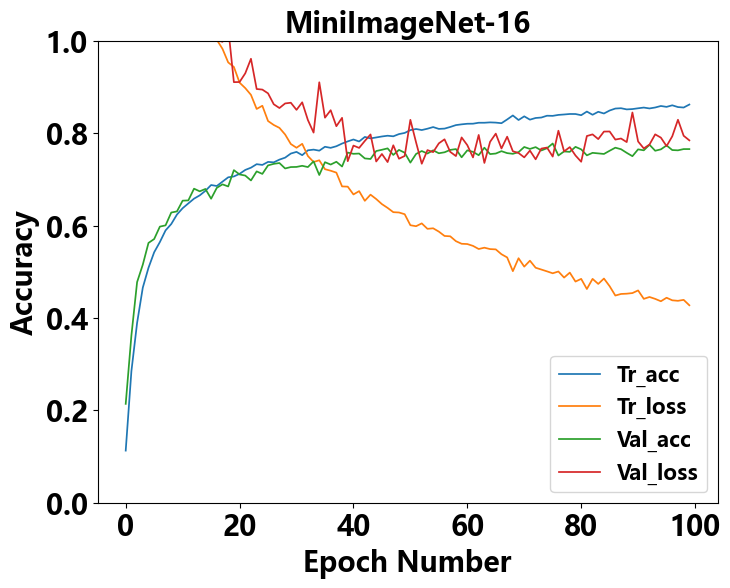

In [6]:
Tr_acc1,Tr_loss1 ,Val_acc1,Val_loss1=readcsv1(r"D:\code\bigPaper\ShuffleNetV2_37classAguBalance_batchsize32.csv")
# Tr_acc2,Tr_loss2 ,Val_acc2,Val_loss2=readcsv1(r"E:\zh\analyseData\GA_dropout\alexnet_miniImage16classify_1Drop.csv")
# Tr_acc3,Tr_loss3 ,Val_acc3,Val_loss3,P3=readcsv1(r"E:\zh\analyseData\GA_dropout\alexnet_miniImage16classify_1curriculumDrop.csv")
# Tr_acc4,Tr_loss4 ,Val_acc4,Val_loss4,P4=readcsv1(r"E:\zh\analyseData\GA_dropout\alexnet_miniImage16classify_GA1Drop_loss_dynamicP_review_advateP.csv")
# Tr_acc5,Tr_loss5 ,Val_acc5,Val_loss5,P5=readcsv1(r"E:\zh\analyseData\GA_dropout\alexnet_cifar10_GA1dropAdvateP.csv")
# Tr_acc4,Tr_loss4 ,Val_acc4,Val_loss4,p4=readcsv1(r"E:\zh\analyseData\GA_dropout\alexnet_miniImage16classify_GA1Drop_loss_dynamicP.csv")
# P=readcsv1(r"E:\zh\analyseData\GA_dropout\allP.csv")
# Tr_acc4,Tr_loss4 ,Val_acc4,Val_loss4=readcsv1(r"E:\zh\analyseData\GA_dropout\alexnet_miniImage16classify_GA1Drop_loss_review.csv")
# Tr_acc5,Tr_loss5 ,Val_acc5,Val_loss5,P=readcsv1(r"E:\zh\analyseData\GA_dropout\alexnet_miniImage16classify_GA1Drop_loss_dynamicP_review_remainHigh.csv")
plt.rcParams["figure.figsize"] = (8,6)#调节图的大小 
plt.plot(Tr_acc1,linewidth=1.25)#画线
plt.plot(Tr_loss1,linewidth=1.25)
plt.plot(Val_acc1,linewidth=1.25)
plt.plot(Val_loss1,linewidth=1.25)
plt.title('MiniImageNet-16',fontdict={'family':'Microsoft YaHei','size':20,'weight':'bold'})
plt.legend(['Tr_acc','Tr_loss','Val_acc','Val_loss'],loc='lower right',prop={'family':'Microsoft YaHei','size':15,'weight':'bold'})
plt.xticks(fontproperties={'family':'Microsoft YaHei','size':20,'weight':'bold'})
plt.yticks(fontproperties={'family':'Microsoft YaHei','size':20,'weight':'bold'})
plt.xlabel('Epoch Number',fontproperties={'family':'Microsoft YaHei','size':20,'weight':'bold'})
plt.ylabel('Accuracy',fontproperties={'family':'Microsoft YaHei','size':20,'weight':'bold'})
plt.ylim(0,1)
# plt.savefig(r'E:\zh\论文\实验图\alexnet_miniImage16classify.jpg',dpi=300,bbox_inches='tight')
plt.show()

# plt.plot(P3,linewidth=3)
# plt.plot(P4,linewidth=3)
# plt.title('alexnet_miniImage16classify_dropRate',fontsize=20)
# plt.legend(['curriculum dropout','our dropout'],fontsize=20,loc='lower right')
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.xlabel('Epoch Number',fontsize=20)
# plt.ylabel('dropout rate',fontsize=20)
# plt.ylim(0.5,0.91)
# plt.savefig(r'E:\zh\analyseData\小论文数据\小论文图\alexnet_miniImage16classify_dropRate.jpg',bbox_inches='tight')
# plt.show()